# Analysis of the fligth into the ceiling on 10/28/2024 #
Imports

In [94]:
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np

In [78]:
# Load the JSON data from the file
with open('hardware_data.json', 'r') as file:
    data = json.load(file)

# Extract the "drone" data
drone_data = data.get("drone", {})

# Print out the keys for all the data types within "drone"
print("Keys in drone data:")
for key in drone_data.keys():
    print(f'\"{key}\",')

Keys in drone data:
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
"ae483log.psi",
"ae483log.theta",
"ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"stateEstimate.x",
"stateEstimate.y",
"stateEstimate.z",
"stateEstimate.yaw",
"stateEstimate.pitch",
"stateEstimate.roll",
"stateEstimate.vx",
"stateEstimate.vy",
"stateEstimate.vz",
"ae483log.w_x",
"ae483log.w_y",
"ae483log.w_z",
"ae483log.n_x",
"ae483log.n_y",
"ae483log.r",
"ae483log.a_z",
"ae483log.p_x_des",
"ae483log.p_y_des",
"ae483log.p_z_des",
"ctrltarget.x",
"ctrltarget.y",
"ctrltarget.z",
"ae483log.m_1",
"ae483log.m_2",
"ae483log.m_3",
"ae483log.m_4",
"ae483log.p_x_mocap",
"ae483log.p_y_mocap",
"ae483log.p_z_mocap",
"ae483log.psi_mocap",
"ae483log.theta_mocap",
"ae483log.phi_mocap",
"extravars.set_motors",
"extravars.a_x",
"extravars.a_y",
"extravars.v_x_int",
"extravars.v_y_int",
"extravars.v_z_int",
"extravars.p_x_int",
"extravars.p_y_int",
"extravars.p_z_int",
"extravars.a_x_in_W",
"extravars.a_y_in_W",
"extrav

In [131]:
def plot_drone_data(file_path, plot_keys, start_trim=0, end_trim=0, trim_around=None):
    # Load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the "drone" data
    drone_data = data.get("drone", {})

    # Filter data to include only specified plot keys
    filtered_data = {key: value for key, value in drone_data.items() if key in plot_keys}

    # Determine the number of subplots based on the number of keys in filtered data
    num_plots = len(filtered_data)
    fig, axes = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), sharex=False)

    # If there's only one key, make axes a list for compatibility
    if num_plots == 1:
        axes = [axes]

    set_motors_data = drone_data.get("extravars.set_motors", {})
    transition_time_indices = []
    if set_motors_data:
        motors_time = set_motors_data.get("time", [])
        motors_data = set_motors_data.get("data", [])
        
        # Find the last 1 and the first 0 after it
        for i in range(len(motors_data) - 1):
            if motors_data[i] == 1 and motors_data[i + 1] == 0:
                transition_time_indices.append((motors_time[i], motors_time[i + 1]))

        if trim_around is not None:
            start_trim = transition_time_indices[0][0] - trim_around
            end_trim = motors_time[-1] - transition_time_indices[0][1] - trim_around


    # Iterate over each key in the filtered drone data and create a subplot
    for idx, (key, value) in enumerate(filtered_data.items()):
        time_data = value.get("time", [])
        y_data = value.get("data", [])

        # Convert start_trim and end_trim times to indices
        start_index = next((i for i, t in enumerate(time_data) if t >= start_trim), 0)
        end_index = next((i for i, t in enumerate(time_data) if t >= time_data[-1] - end_trim), len(time_data))

        # Apply trimming based on time values
        trimmed_time_data = time_data[start_index:end_index]
        trimmed_y_data = y_data[start_index:end_index]
        # print(end_index)

        # Plot the trimmed time vs. data for each key
        # axes[idx].plot(trimmed_time_data, np.rad2deg(trimmed_y_data))
        axes[idx].scatter(trimmed_time_data, trimmed_y_data, s=2)
        
        for t1, t2 in transition_time_indices:
            if t1 >= trimmed_time_data[0] and t1 <= trimmed_time_data[-1]:
                axes[idx].axvline(x=t1, color='r', linestyle='--', label='Last 1')
            if t2 >= trimmed_time_data[0] and t2 <= trimmed_time_data[-1]:
                axes[idx].axvline(x=t2, color='b', linestyle='--', label='First 0')

        # Set title and labels
        axes[idx].set_title(key)
        axes[idx].set_ylabel('')  # Leave y-axis label empty
        axes[idx].set_xlabel('Time [s]')
        axes[idx].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axes[idx].grid()

        # Set x-axis limits to match the data range for each subplot
        axes[idx].set_xlim([trimmed_time_data[0], trimmed_time_data[-1]])

        # Prevent scientific notation on y-axis
        axes[idx].yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

    plt.tight_layout()
    plt.show()

# # Example usage
# # plot_keys = ["ae483log.n_x", 
# #              "ae483log.n_y",
# #              "ae483log.r",
# #              "ae483log.a_z",
# #              "ae483log.p_z_des",
# #              "ae483log.m_1"]
             
# plot_drone_data('hardware.json', plot_keys, start_trim=0, end_trim=1)

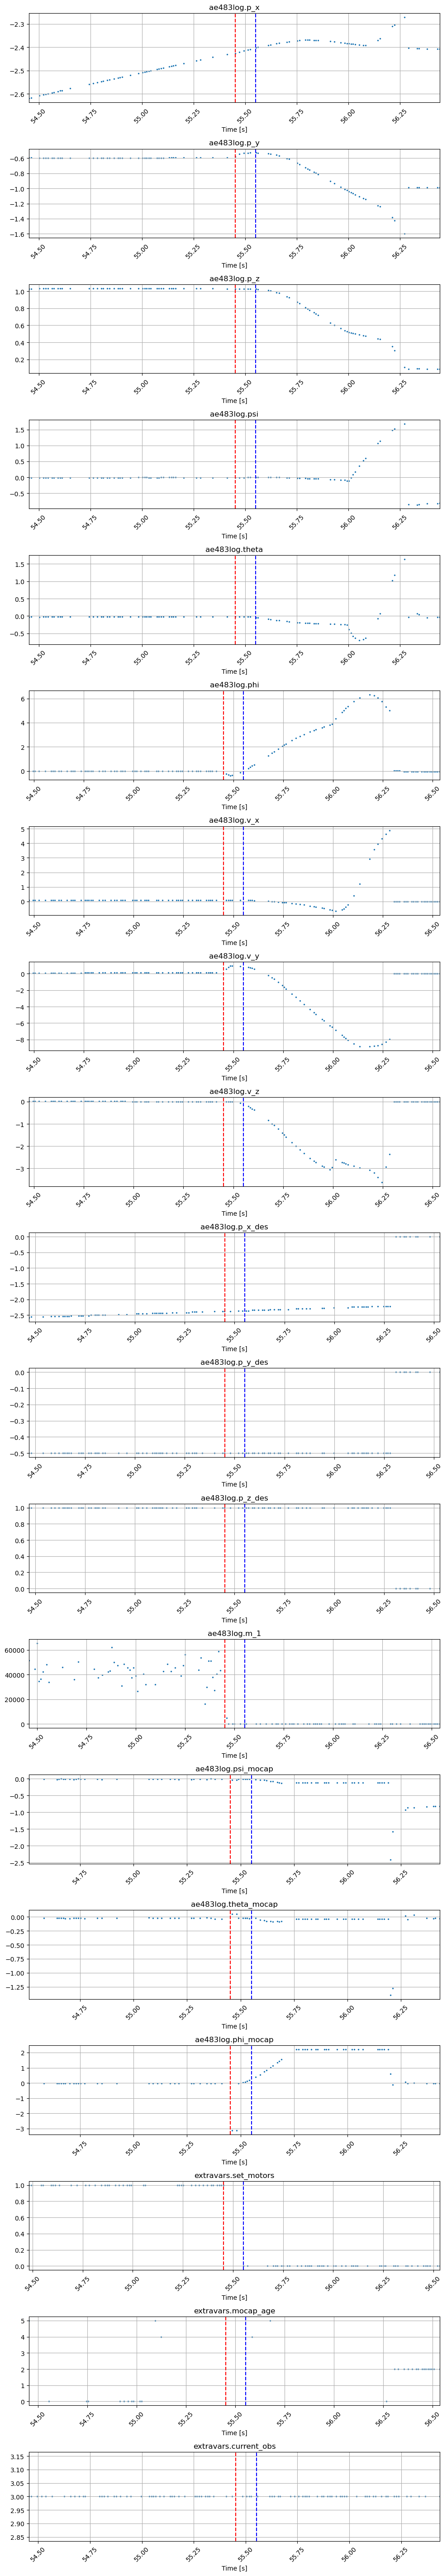

In [150]:
plot_keys = [
"ae483log.m_1",
"ae483log.p_x",
"ae483log.p_y",
"ae483log.p_z",
"ae483log.psi",
"ae483log.theta",
"ae483log.phi",
"ae483log.v_x",
"ae483log.v_y",
"ae483log.v_z",
"ae483log.p_x_des",
"ae483log.p_y_des",
"ae483log.p_z_des",
"ae483log.psi_mocap",
"ae483log.theta_mocap",
"ae483log.phi_mocap",
"extravars.set_motors",
"extravars.current_obs",
# "debugvars.psi_des_norm",
# "debugvars.psi_inter",
# "debugvars.tau_z",
# "debugvars.psi_inter_2",
'extravars.mocap_age'
             ]

plot_drone_data('md_flight_test_D1.json', plot_keys, start_trim=0.0, end_trim=0, trim_around=1)

In [63]:
def plot_drone_data_ontop(file_path, plot_keys, start_trim=0, end_trim=0):
    # Load the JSON data from the file
    with open(file_path, 'r') as file:
        data = json.load(file)

    # Extract the "drone" data
    drone_data = data.get("drone", {})

    # Filter data to include only specified plot keys
    filtered_data = {key: value for key, value in drone_data.items() if key in plot_keys}

    # Determine the number of subplots based on the number of keys in filtered data
    fig, axes = plt.subplots(1, 1, figsize=(10, 1 * 3), sharex=False)

    # If there's only one key, make axes a list for compatibility
    # axes = [axes]

    # Iterate over each key in the filtered drone data and create a subplot
    for idx, (key, value) in enumerate(filtered_data.items()):
        time_data = value.get("time", [])
        y_data = value.get("data", [])

        # Convert start_trim and end_trim times to indices
        start_index = next((i for i, t in enumerate(time_data) if t >= start_trim), 0)
        end_index = next((i for i, t in enumerate(time_data) if t >= time_data[-1] - end_trim), len(time_data))

        # Apply trimming based on time values
        trimmed_time_data = time_data[start_index:end_index]
        trimmed_y_data = y_data[start_index:end_index]
        # print(end_index)

        # Plot the trimmed time vs. data for each key
        # axes[idx].plot(trimmed_time_data, np.rad2deg(trimmed_y_data))
        axes.plot(trimmed_time_data, trimmed_y_data)
        
        # Set title and labels
        axes.set_title(key)
        axes.set_ylabel('')  # Leave y-axis label empty
        axes.set_xlabel('Time [s]')
        axes.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for readability
        axes.grid()

        # Set x-axis limits to match the data range for each subplot
        axes.set_xlim([trimmed_time_data[0], trimmed_time_data[-1]])

        # Prevent scientific notation on y-axis
        axes.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))

    plt.tight_layout()
    plt.show()


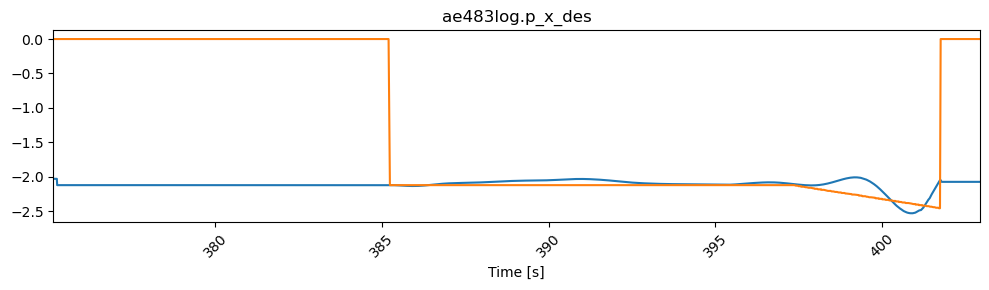

In [70]:
plot_keys = [
"ae483log.p_x",
'ae483log.p_x_des',
             ]

plot_drone_data_ontop('hardware_data.json', plot_keys, start_trim=0.0, end_trim=0.0)

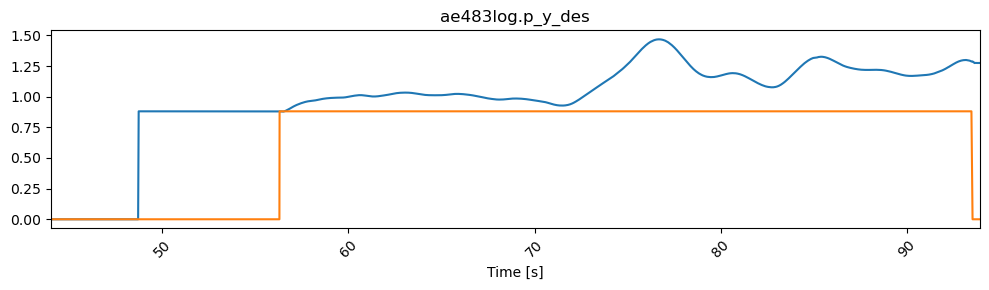

In [66]:
plot_keys = [
"ae483log.p_y",
'ae483log.p_y_des',
             ]

plot_drone_data_ontop('hardware_data.json', plot_keys, start_trim=0.0, end_trim=0.0)

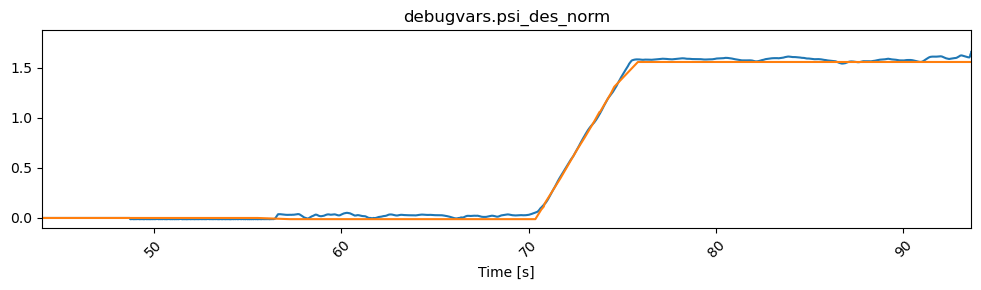

In [69]:
plot_keys = [
"ae483log.psi",
'debugvars.psi_des_norm',
             ]

plot_drone_data_ontop('hardware_data.json', plot_keys, start_trim=0.0, end_trim=0.0)